# Experiment-4

## Aim: Edge detection using Roberts, Perwitt and Sobel operators

### Theory:

**Edge detection:**

Edges are significant local changes of intensity in a digital image. An edge can be defined as a set of connected pixels that forms a boundary between two disjoint regions. There are three types of edges:

* Horizontal edges
* Vertical edges
* Diagonal edges

Edge Detection is a method of segmenting an image into regions of discontinuity. It is a widely used technique in digital image processing like

* pattern recognition
* image morphology
* feature extraction

Edge detection allows users to observe the features of an image for a significant change in the gray level. This texture indicating the end of one region in the image and the beginning of another. It reduces the amount of data in an image and preserves the structural properties of an image.




##### 1. Robert:
The Roberts edge operator is a 2*2 mask that uses the difference between two diagonally adjacent pixels, and then takes the sum of the squares of the differences between the two diagonal pixels. The template is showing as:
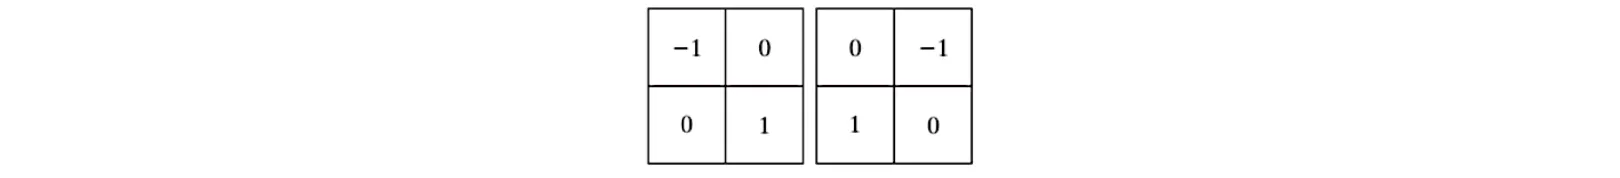

And the algorithms are:
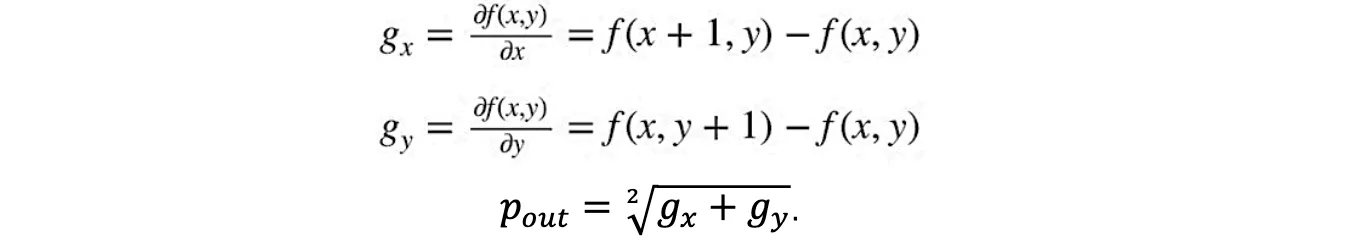

The Roberts algorithm employs local differential operators to detect edges in an image. It performs particularly well when the edges in the image are close to either +45 degrees or -45 degrees. The Roberts operator is known for its high precision in edge detection. However, from the processing results, it is evident that the Roberts algorithm is quite sensitive to noise. Therefore, it is best suited for image segmentation where the edges are distinct and there is minimal noise.

#Coding Part

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

array([[[ 39,  89,  89],
        [ 39,  89,  89],
        [ 34,  86,  86],
        ...,
        [ 78, 102, 108],
        [ 80, 104, 110],
        [ 82, 108, 114]],

       [[ 33,  85,  85],
        [ 35,  87,  87],
        [ 35,  87,  87],
        ...,
        [ 78, 102, 108],
        [ 80, 104, 110],
        [ 83, 109, 115]],

       [[ 34,  86,  86],
        [ 35,  87,  87],
        [ 37,  89,  89],
        ...,
        [ 79, 103, 109],
        [ 80, 104, 110],
        [ 82, 108, 114]],

       ...,

       [[ 14,  18,  23],
        [ 14,  18,  23],
        [ 13,  16,  24],
        ...,
        [ 22,  63, 102],
        [ 23,  62, 107],
        [ 23,  61, 109]],

       [[ 14,  18,  23],
        [ 14,  18,  23],
        [ 14,  17,  25],
        ...,
        [ 24,  63, 102],
        [ 22,  61, 106],
        [ 25,  61, 109]],

       [[ 15,  18,  26],
        [ 15,  18,  26],
        [ 14,  17,  25],
        ...,
        [ 24,  63, 102],
        [ 22,  61, 106],
        [ 24,  60, 108]]], dtype=uint8)
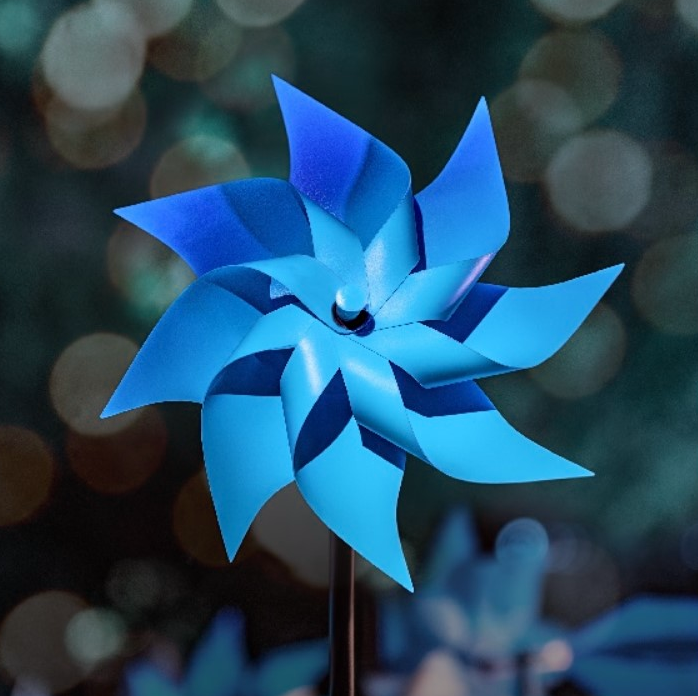

In [ ]:
edgeimg = cv.imread('/content/drive/MyDrive/CVR LAB/Dataset exp 1/edge_image.png', cv.COLOR_BGR2RGB)
edgeimg

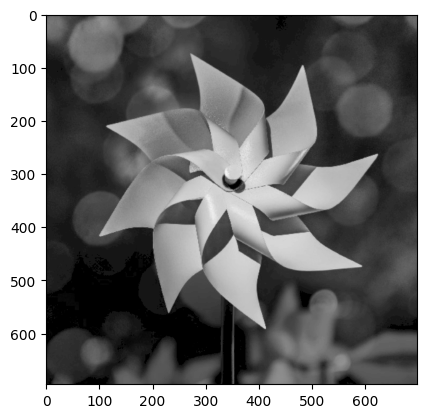

In [ ]:
gray_img = cv.imread('/content/drive/MyDrive/CVR LAB/Exp4 dataset/edge_image.png', cv.IMREAD_GRAYSCALE)
plt.imshow(gray_img, cmap='gray')


In [ ]:
#Step2 -: Defining the kernel that would convulge through x and y axis
kernel_gx = np.array([[1, 0], [0,-1]])
kernel_gy = np.array([[0, 1], [-1,0]])

In [ ]:
gradient_x = cv.filter2D(gray_img, cv.CV_32F, kernel_gx)
gradient_y = cv.filter2D(gray_img, cv.CV_32F, kernel_gy)

In [ ]:
gradient_x.dtype

dtype('float32')

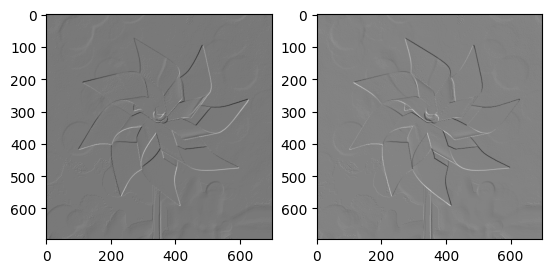

In [ ]:
plt.subplot(121),
plt.imshow(gradient_x, cmap='gray')
plt.subplot(122),
plt.imshow(gradient_y, cmap='gray')

In [ ]:
#Step 3 - calculating the magnitude of the gradient
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

In [ ]:
gradient_magnitude.min()

0.0

In [ ]:
gradient_magnitude.max()

185.60712

In [ ]:
magnitude = cv.magnitude(gradient_x, gradient_y)
print(magnitude.min())
print(magnitude.max())

0.0
185.60712


<function matplotlib.pyplot.show(close=None, block=None)>

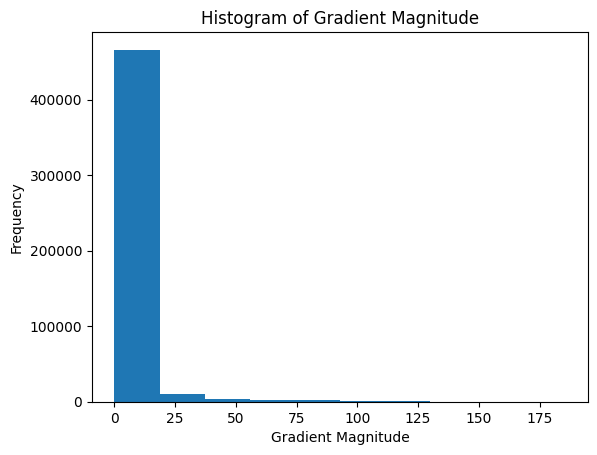

In [ ]:
#Step4-: Plotting or defining the threshhold or plotting
plt.hist(gradient_magnitude.ravel())
plt.title('Histogram of Gradient Magnitude')
plt.xlabel('Gradient Magnitude')
plt.ylabel('Frequency')
plt.show

In [ ]:
threshold_value = 20
edges = (gradient_magnitude > threshold_value)

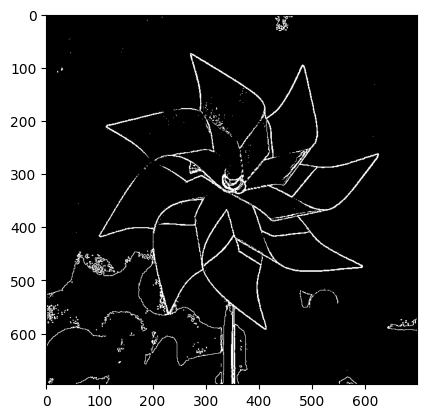

In [ ]:
plt.imshow(edges, cmap='gray')

In [ ]:
threshold_value = 10
edges2 = (gradient_magnitude > threshold_value)

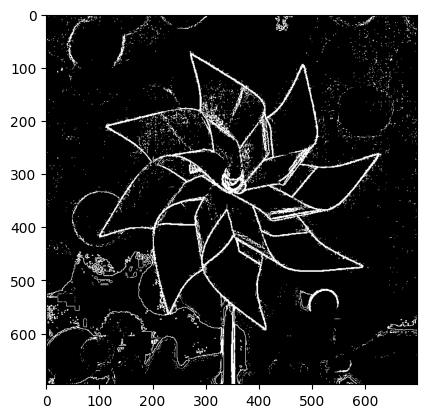

In [ ]:
plt.imshow(edges2, cmap='gray')

In [ ]:
threshold_value = 30
edges3 = (gradient_magnitude > threshold_value)

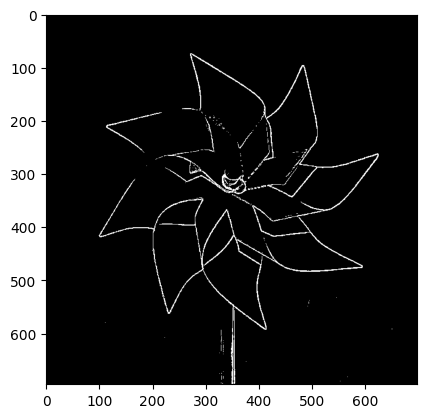

In [ ]:
plt.imshow(edges3, cmap='gray')

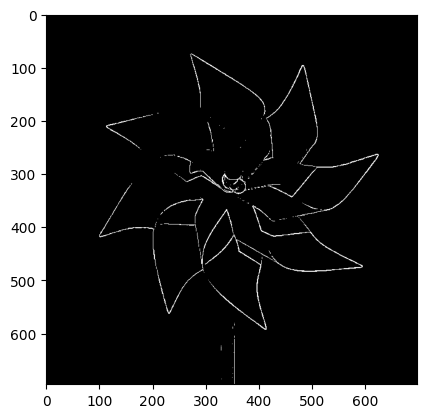

In [ ]:
threshold_value = 50
edges4 = (gradient_magnitude > threshold_value)
plt.imshow(edges4, cmap='gray')

In [ ]:
#prewitt
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

In [ ]:
prewitt_x

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [ ]:
prewitt_y

array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

In [ ]:
gradient_x1 = cv.filter2D(gray_img, cv.CV_32F, prewitt_x)
gradient_y1 = cv.filter2D(gray_img, cv.CV_32F, prewitt_y)

In [ ]:
mag_1 = cv.magnitude(gradient_x1,gradient_y1)

In [ ]:
mag_1.min()

0.0

In [ ]:
mag_1.max()

485.1484

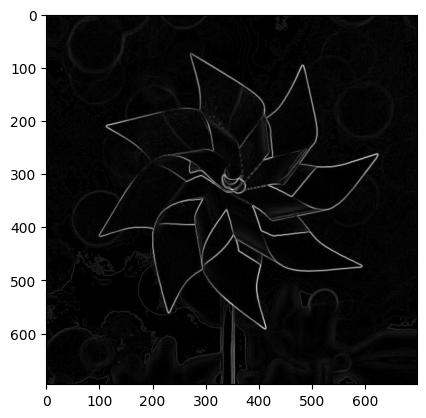

In [ ]:
plt.imshow(mag_1,cmap='gray')

In [ ]:
#Sobel
edges_sobel_x= cv.Sobel(gray_img,cv.CV_32F,1,0)
edges_sobel_y= cv.Sobel(gray_img,cv.CV_32F,0,1)

In [ ]:
edges_sobel_x

array([[  0.,  -2., -10., ..., -10.,  24.,   0.],
       [  0.,   4.,  -4., ...,  -9.,  24.,   0.],
       [  0.,  10.,   6., ...,  -4.,  20.,   0.],
       ...,
       [  0.,   0.,   0., ...,  10.,   8.,   0.],
       [  0.,   0.,   0., ...,   8.,   8.,   0.],
       [  0.,   0.,   0., ...,   8.,   8.,   0.]], dtype=float32)

In [ ]:
edges_sobel_y

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-8., -2., 10., ..., -1.,  0.,  0.],
       [ 8.,  8., 12., ...,  2.,  2., -2.],
       ...,
       [ 0.,  0.,  0., ..., -6., -8., -8.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [ ]:
mag = cv.magnitude(edges_sobel_x,edges_sobel_y)

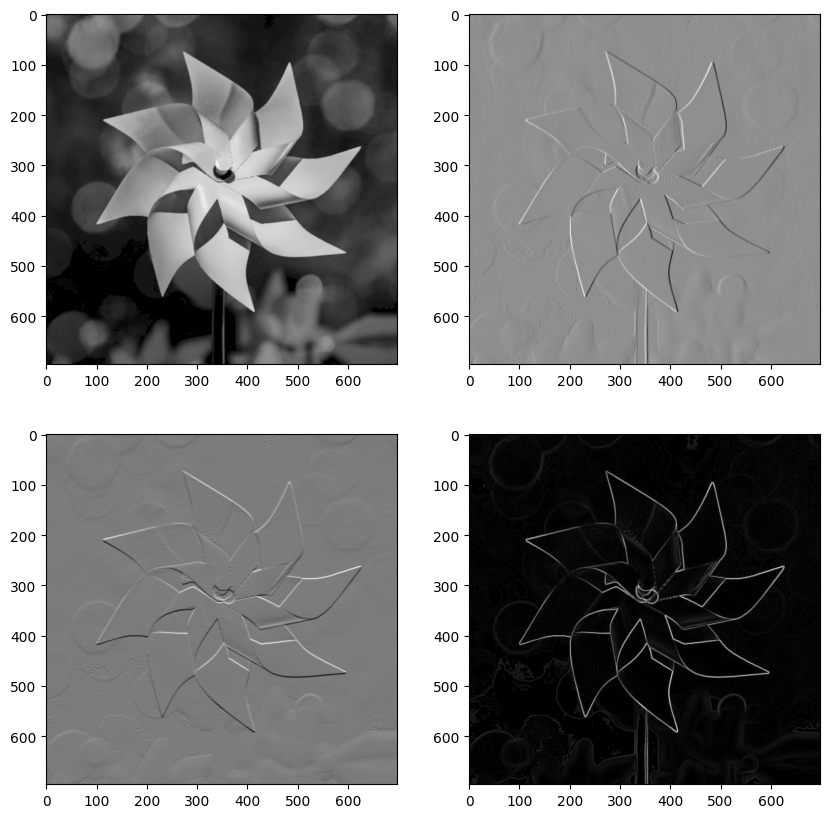

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(gray_img,cmap='gray')
plt.subplot(222)
plt.imshow(edges_sobel_x,cmap='gray')
plt.subplot(223)
plt.imshow(edges_sobel_y,cmap='gray')
plt.subplot(224)
plt.imshow(mag,cmap='gray')

#TASK

# Task-4

1. Import "fruit.png"and "edge_image_detection" image.

2. convert image into RGB colour channel.

3. Convert image into Grayscale channel.

4. Use Roberts cross egde detector for edge detection and display image by defining proper threshold value.

5. Use Prewitt egde detector with  kernel size= 3 and 5 for edge detection and display image by using gradient magnitude directly.

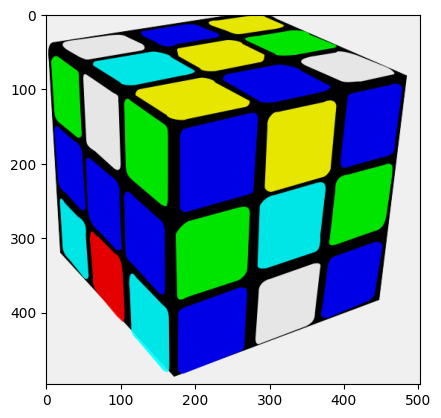

In [ ]:
cube = cv.imread('/content/drive/MyDrive/CVR LAB/Exp4 dataset/edge_image_detection.png')
plt.imshow(cube)

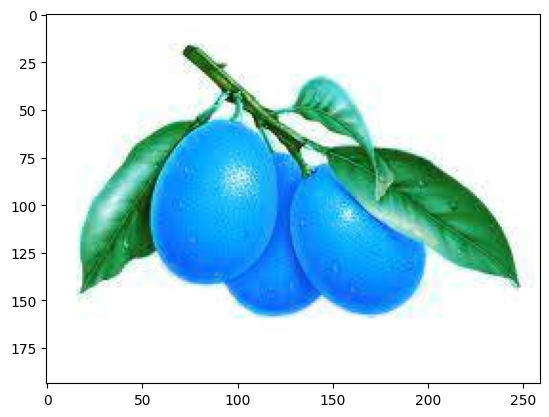

In [ ]:
fruit = cv.imread('/content/drive/MyDrive/CVR LAB/Exp4 dataset/fruit.png')
plt.imshow(fruit)

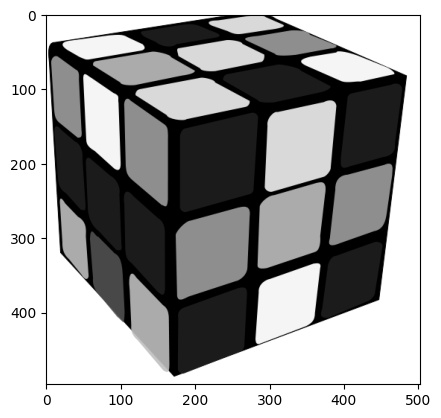

In [ ]:
cube_gray = cv.cvtColor(cube, cv.COLOR_RGB2GRAY)
plt.imshow(cube_gray, cmap='gray')

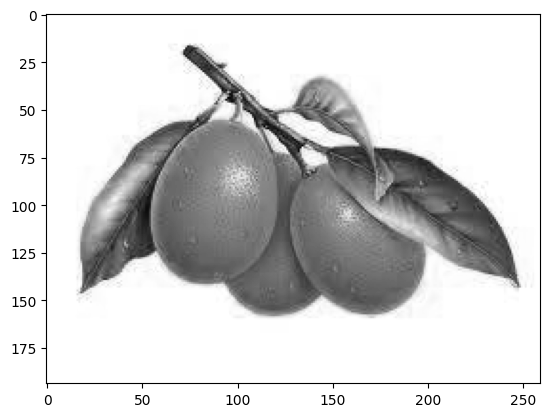

In [ ]:
fruit_gray = cv.cvtColor(fruit, cv.COLOR_RGB2GRAY)
plt.imshow(fruit_gray, cmap='gray')

In [ ]:
gx2 = np.array(([1,0],[0,-1]))
gy2 = np.array(([0,1],[-1,0]))

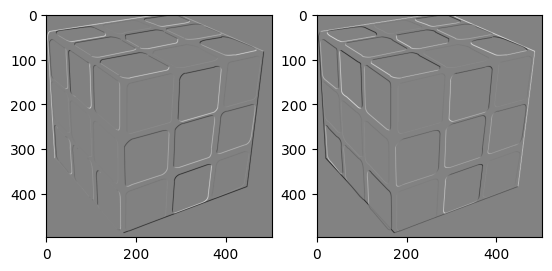

In [ ]:
grad_x = cv.filter2D(cube_gray, cv.CV_32F,gx2)
grad_y = cv.filter2D(cube_gray, cv.CV_32F,gy2)
plt.subplot(121),
plt.imshow(grad_x,cmap='gray')
plt.subplot(122),
plt.imshow(grad_y,cmap='gray')

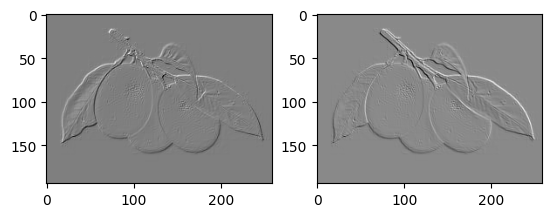

In [ ]:
grad_x1 = cv.filter2D(fruit_gray, cv.CV_32F,gx2)
grad_y1 = cv.filter2D(fruit_gray, cv.CV_32F,gy2)
plt.subplot(121),
plt.imshow(grad_x1,cmap='gray')
plt.subplot(122),
plt.imshow(grad_y1,cmap='gray')

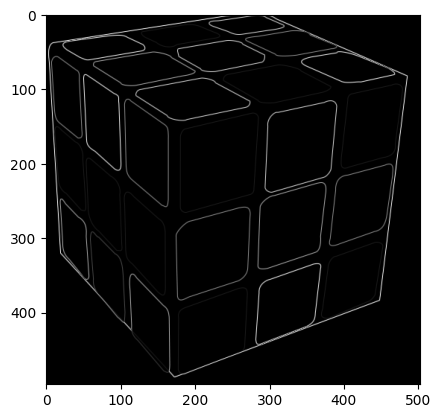

In [ ]:
grad_mag = np.sqrt(grad_x**2+grad_y**2)
plt.imshow(grad_mag, cmap = 'gray')

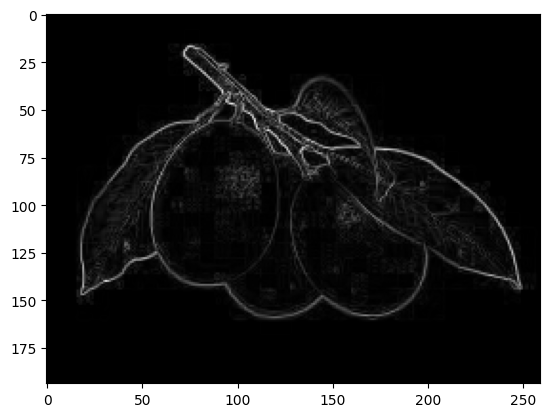

In [ ]:
grad_mag1 = np.sqrt(grad_x1**2+grad_y1**2)
plt.imshow(grad_mag1, cmap = 'gray')

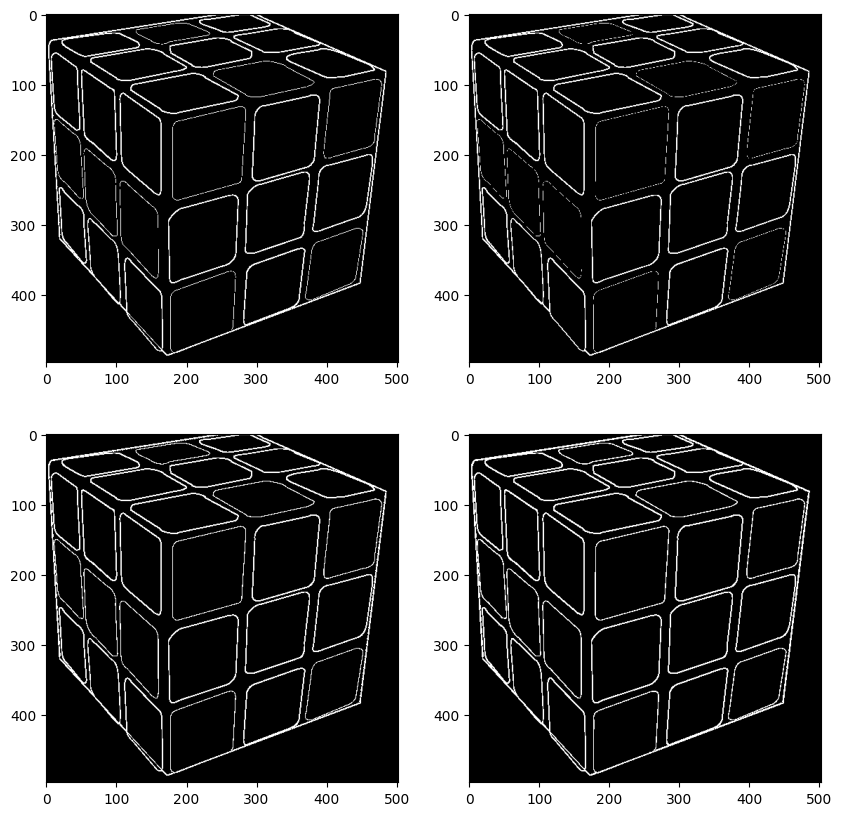

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(221)
threshold_value = 20
edges = (grad_mag>threshold_value)
plt.imshow(edges,cmap='gray')
plt.subplot(222)
threshold_value = 25
edges = (grad_mag>threshold_value)
plt.imshow(edges,cmap='gray')
plt.subplot(223)
threshold_value = 15
edges = (grad_mag>threshold_value)
plt.imshow(edges,cmap='gray')
plt.subplot(224)
threshold_value = 10
edges = (grad_mag>threshold_value)
plt.imshow(edges,cmap='gray')

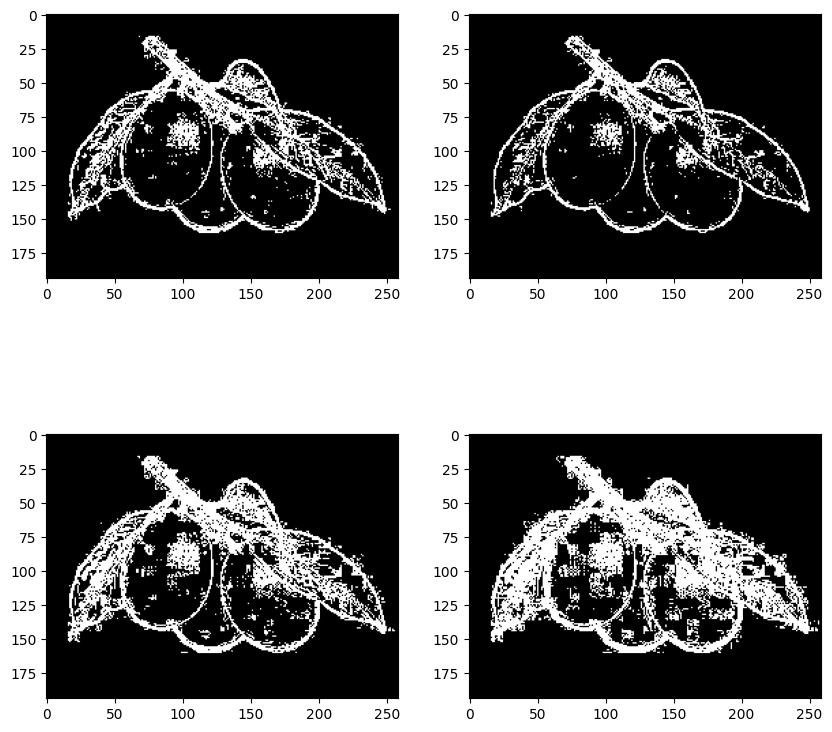

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(221)
threshold_value = 20
edges = (grad_mag1>threshold_value)
plt.imshow(edges,cmap='gray')
plt.subplot(222)
threshold_value = 25
edges = (grad_mag1>threshold_value)
plt.imshow(edges,cmap='gray')
plt.subplot(223)
threshold_value = 15
edges = (grad_mag1>threshold_value)
plt.imshow(edges,cmap='gray')
plt.subplot(224)
threshold_value = 10
edges = (grad_mag1>threshold_value)
plt.imshow(edges,cmap='gray')

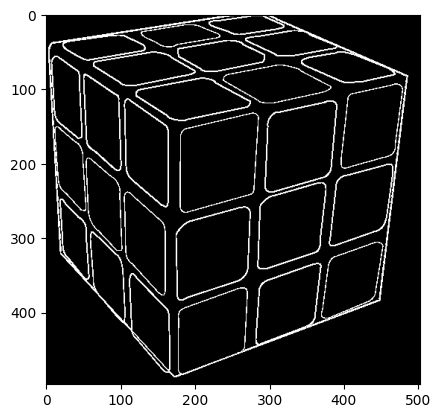

In [ ]:
threshold_value = 10
edges = (grad_mag>threshold_value)
plt.imshow(edges,cmap='gray')

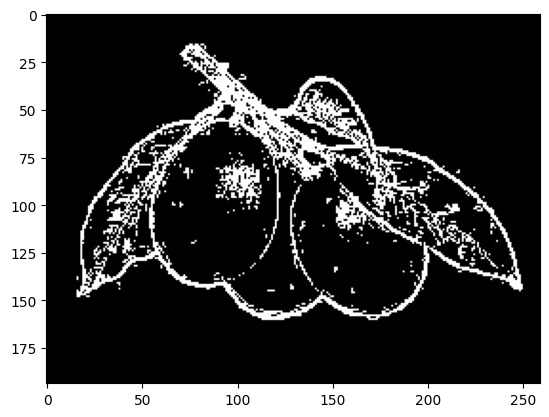

In [ ]:
threshold_value = 25
edges = (grad_mag1>threshold_value)
plt.imshow(edges,cmap='gray')

In [ ]:
prewitt_x = np.array([[-2,-1,0,1,2],[-2,-1,0,1,2],[-2,-1,0,1,2],[-2,-1,0,1,2],[-2,-1,0,1,2]])
prewitt_y = np.array([[-2,2,-2],[-1,-1,-1],[0,0,0],[1,1,1],[2,2,2]])

In [ ]:
grad_cube = cv.filter2D(cube_gray, cv.CV_32F,prewitt_x)
grad_cube = cv.filter2D(cube_gray, cv.CV_32F,prewitt_y)

In [ ]:
mag_1 = cv.magnitude(grad_cube,grad_cube)

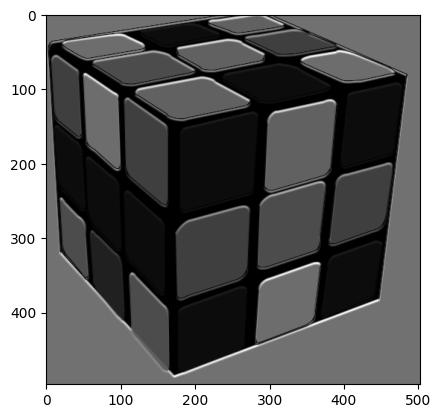

In [ ]:
plt.imshow(mag_1,cmap='gray')

In [ ]:
grad_fruit = cv.filter2D(fruit_gray, cv.CV_32F,prewitt_x)
grad_fruit = cv.filter2D(fruit_gray, cv.CV_32F,prewitt_y)

In [ ]:
mag_1 = cv.magnitude(grad_fruit,grad_fruit)

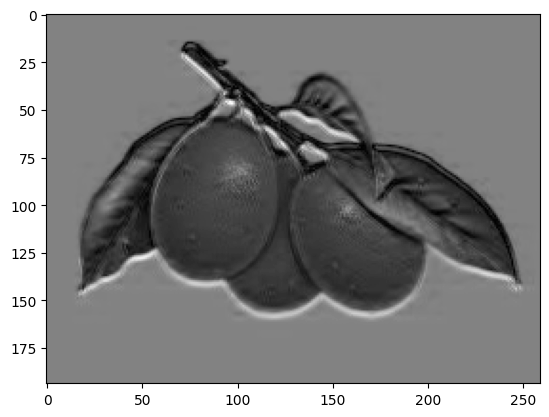

In [ ]:
plt.imshow(mag_1,cmap='gray')

# Conclusion:

Edge detection is a crucial step in many computer vision tasks, and various operators like Roberts, Prewitt, and Sobel are commonly used for this purpose. Here’s how you can implement these edge detection techniques using Python and OpenCV:

* Roberts Operator: This operator uses two 2x2 kernels to approximate the gradient.
* Prewitt Operator: Similar to Sobel, but with different kernel coefficients.
* Sobel Operator: It uses a larger convolution kernel (typically 3x3) to detect edges.